In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [57]:
df = pd.read_json('data/yelpreviews_50K.json', lines = True)

In [58]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [59]:
df.describe()

,stars,useful,funny,cool
count,50000.000000,50000.00000,50000.000000,50000.000000
mean,3.751000,1.09776,0.369840,0.448920
std,1.433862,2.37475,1.345412,1.441885
min,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000
75%,5.000000,1.00000,0.000000,0.000000
max,5.000000,98.00000,75.000000,93.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    50000 non-null  object        
 1   user_id      50000 non-null  object        
 2   business_id  50000 non-null  object        
 3   stars        50000 non-null  int64         
 4   useful       50000 non-null  int64         
 5   funny        50000 non-null  int64         
 6   cool         50000 non-null  int64         
 7   text         50000 non-null  object        
 8   date         50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 3.4+ MB


In [61]:
df.groupby('stars').describe()


useful                                                  funny  \
         count      mean       std  min  25%  50%  75%   max    count   
stars                                                                   
1       6911.0  1.633628  3.151145  0.0  0.0  1.0  2.0  75.0   6911.0   
2       4034.0  1.311849  2.464511  0.0  0.0  0.0  2.0  44.0   4034.0   
3       5605.0  1.042284  1.818150  0.0  0.0  0.0  1.0  21.0   5605.0   
4      11494.0  1.107099  2.257872  0.0  0.0  0.0  1.0  48.0  11494.0   
5      21956.0  0.899025  2.224940  0.0  0.0  0.0  1.0  98.0  21956.0   

                 ...                cool                                     \
           mean  ...  75%   max    count      mean       std  min  25%  50%   
stars            ...                                                          
1      0.527709  ...  1.0  33.0   6911.0  0.197511  0.685111  0.0  0.0  0.0   
2      0.530739  ...  0.0  66.0   4034.0  0.320526  1.173363  0.0  0.0  0.0   
3      0.424442  ...  0.0  15.0   5605.0  0.450669  1.194922  0.0  0.0  0.0   
4      0.411780  ...  0.0  45.0  11494.0  0.650426  1.769975  0.0  0.0  0.0   
5      0.254691  ...  0.0  75.0  21956.0  0.445710  1.511759  0.0  0.0  0.0   

                  
       75%   max  
stars             
1      0.0  12.0  
2      0.0  31.0  
3      0.0  21.0  
4      1.0  47.0  
5      0.0  93.0  

[5 rows x 24 columns]

In [62]:
df['length'] = df['text'].apply(len)
df['text'] = df['text'].str.lower()

<IPython.core.display.Javascript object>


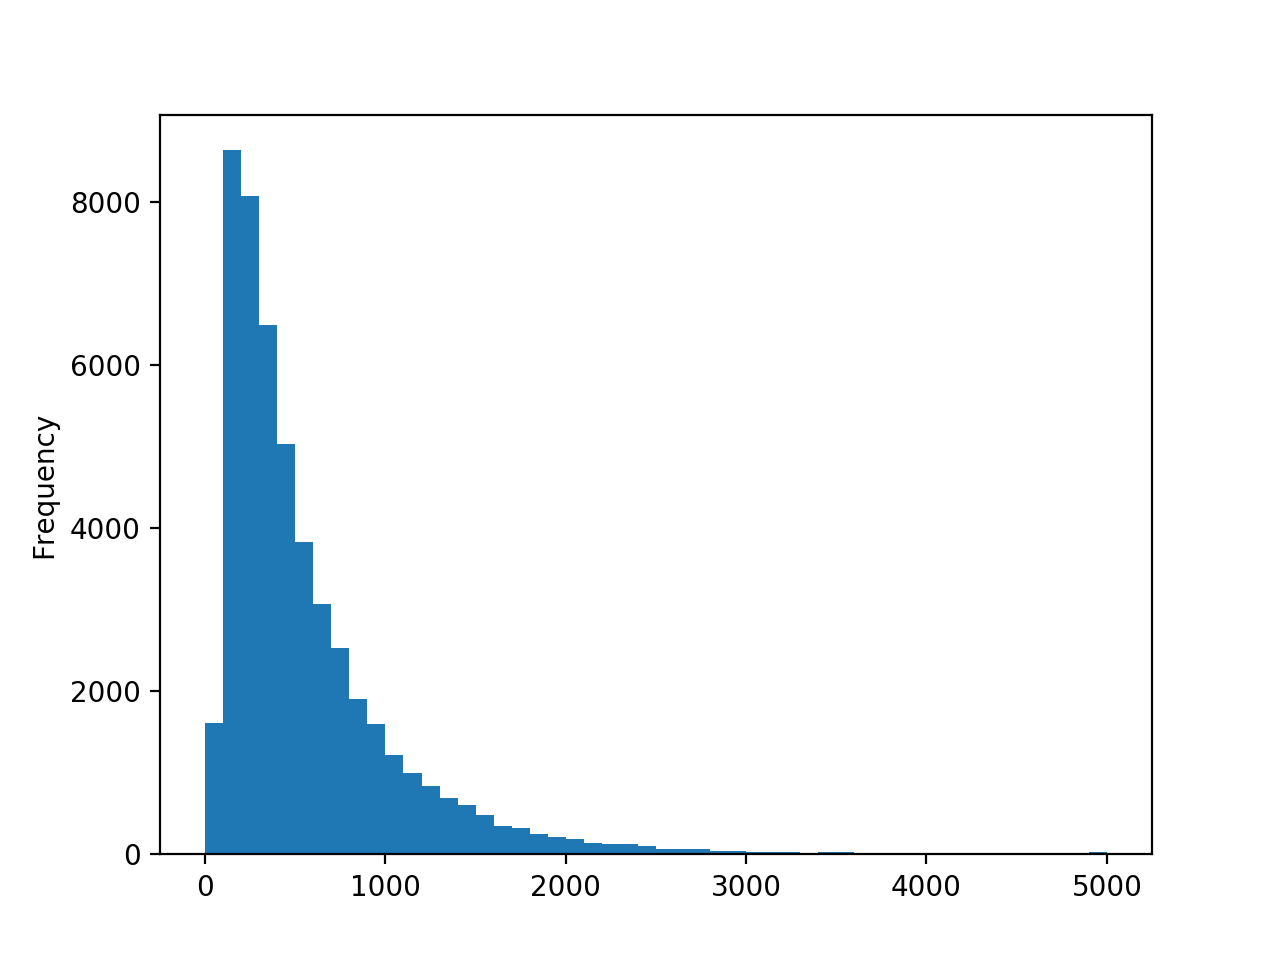

In [63]:
df['length'].plot(bins=50, kind='hist')

In [64]:
df.length.describe()

count    50000.000000
mean       571.614280
std        529.622173
min          2.000000
25%        228.000000
50%        405.000000
75%        729.000000
max       5000.000000
Name: length, dtype: float64

<IPython.core.display.Javascript object>


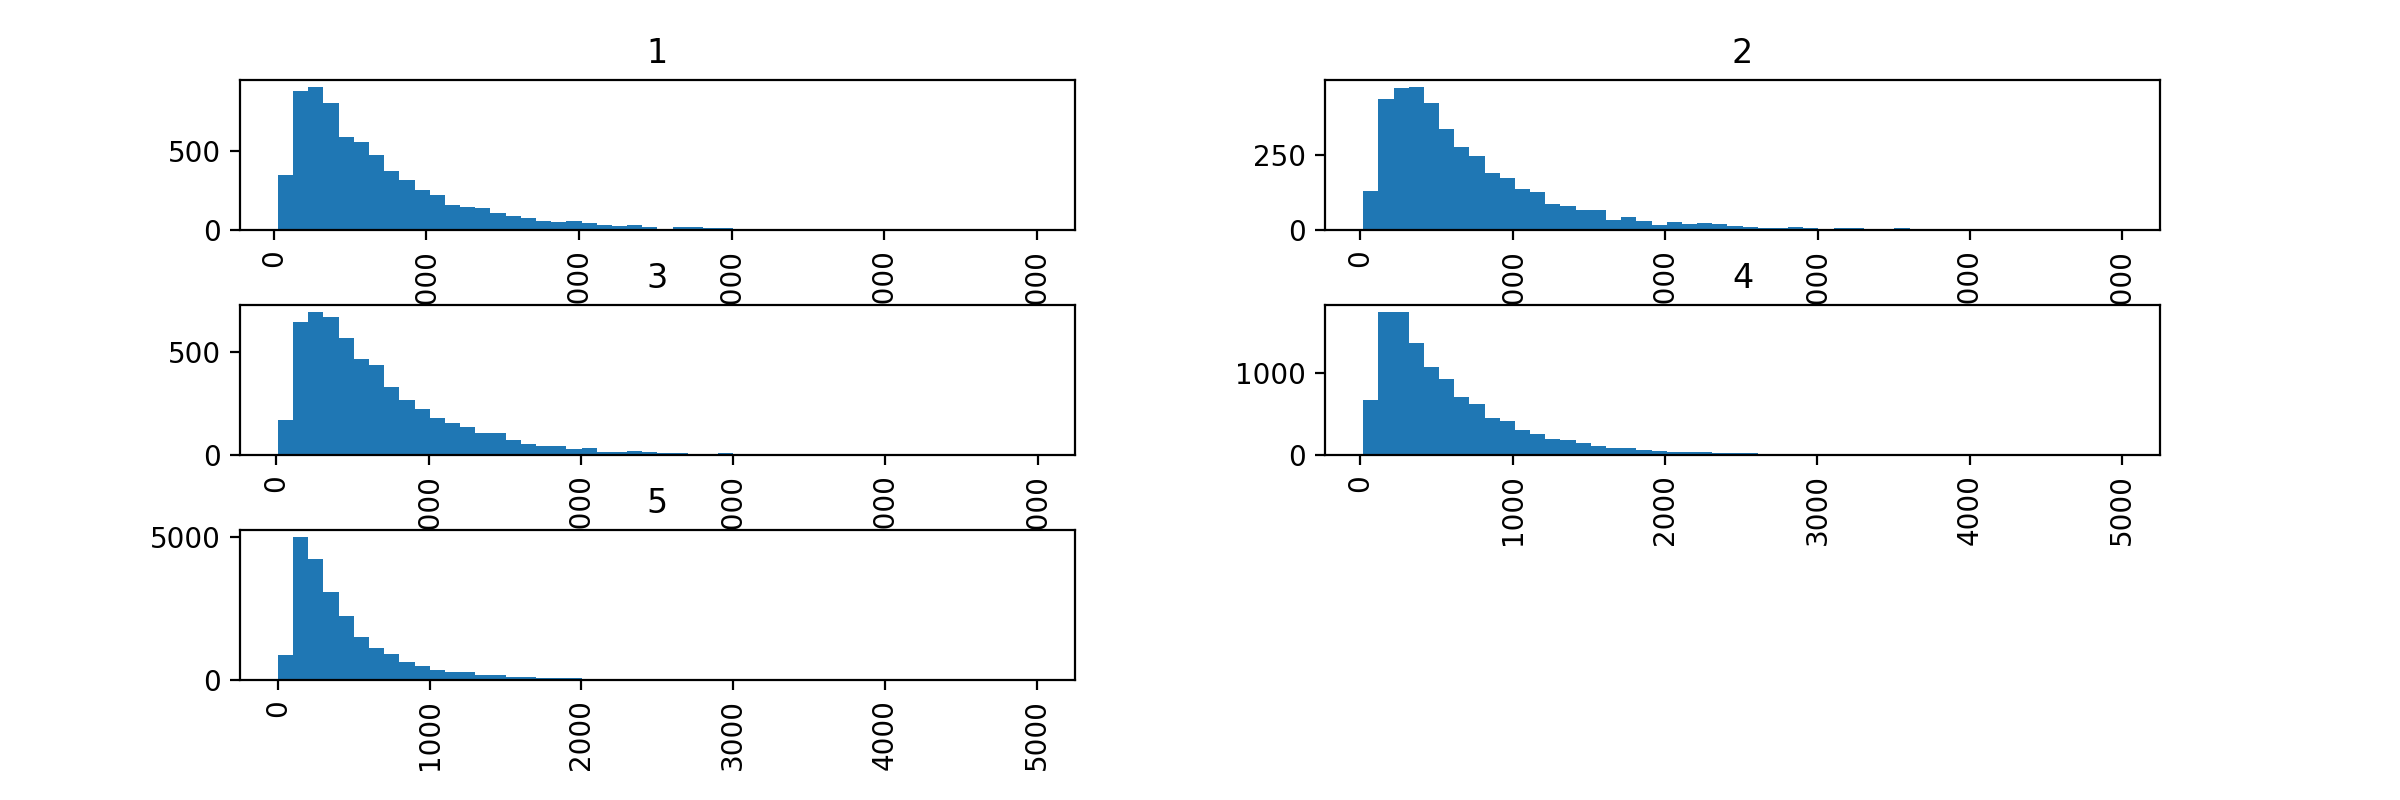

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6f75e810>,
      dtype=object)

In [65]:
df.hist(column='length', by='stars', bins=50,figsize=(12,4))

In [66]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [67]:
df["review_no_punct"] = df['text'].apply(remove_punctuations)

In [68]:
df['review_no_punct']

0        as someone who has worked with many museums i ...
1        i am actually horrified this place is still in...
2        i love deagans i do i really do the atmosphere...
3        dismal lukewarm defrostedtasting texmex glop\n...
4        oh happy day finally have a canes near my casa...
                               ...                        
49995    there was this cashier thats shit rude and end...
49996    i love pierogis we showed up got a table and w...
49997    an impromptu sunday night dinner invite from m...
49998    id give this 35 stars if i could\n\nthe space ...
49999    i have visited this restaurant many times and ...
Name: review_no_punct, Length: 50000, dtype: object

In [69]:
def remove_stopwords(text):
    tokens = [word for word in text.split() if word.isalpha()]
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [word for word in tokens if len(word) > 1]
    return ''.join(tokens)

In [70]:
df["review_no_stopwords"] = df['review_no_punct'].apply(remove_punctuations)

In [71]:
df['review_no_stopwords'].head()

0    as someone who has worked with many museums i ...
1    i am actually horrified this place is still in...
2    i love deagans i do i really do the atmosphere...
3    dismal lukewarm defrostedtasting texmex glop\n...
4    oh happy day finally have a canes near my casa...
Name: review_no_stopwords, dtype: object

In [72]:
df['review_no_stopwords'].head()[0]

'as someone who has worked with many museums i was eager to visit this gallery on my most recent trip to las vegas when i saw they would be showing infamous eggs of the house of faberge from the virginia museum of fine arts vmfa i knew i had to go\n\ntucked away near the gelateria and the garden the gallery is pretty much hidden from view its what real estate agents would call cozy or charming  basically any euphemism for small\n\nthat being said you can still see wonderful art at a gallery of any size so why the two s you ask let me tell you\n\n pricing for this while relatively inexpensive for a las vegas attraction is completely over the top for the space and the amount of art you can fit in there it is a bit much\n its not kid friendly at all seriously dont bring them\n the security is not trained properly for the show when the curating and design teams collaborate for exhibitions there is a definite flow that means visitors should view the art in a certain sequence whether it be b

In [73]:
df = df.replace(r'\n','', regex=True) 

In [74]:
df['review_no_stopwords'].head()[0]

'as someone who has worked with many museums i was eager to visit this gallery on my most recent trip to las vegas when i saw they would be showing infamous eggs of the house of faberge from the virginia museum of fine arts vmfa i knew i had to gotucked away near the gelateria and the garden the gallery is pretty much hidden from view its what real estate agents would call cozy or charming  basically any euphemism for smallthat being said you can still see wonderful art at a gallery of any size so why the two s you ask let me tell you pricing for this while relatively inexpensive for a las vegas attraction is completely over the top for the space and the amount of art you can fit in there it is a bit much its not kid friendly at all seriously dont bring them the security is not trained properly for the show when the curating and design teams collaborate for exhibitions there is a definite flow that means visitors should view the art in a certain sequence whether it be by historical per

In [75]:
import nltk
# nltk.download('wordnet')

In [76]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()


def lemmatize_stemmer_text(text):
    stem = [stemmer.stem(w) for w in w_tokenizer.tokenize(text)]
    return " ".join([lemmatizer.lemmatize(w) for w in stem])


In [78]:
# new = lemmatize_stemmer_text(df['review_no_stopwords'].iloc[0])

In [79]:
# new

'a someon who ha work with mani museum i wa eager to visit thi galleri on my most recent trip to la vega when i saw they would be show infam egg of the hous of faberg from the virginia museum of fine art vmfa i knew i had to gotuck away near the gelateria and the garden the galleri is pretti much hidden from view it what real estat agent would call cozi or charm basic ani euphem for smallthat be said you can still see wonder art at a galleri of ani size so whi the two s you ask let me tell you price for thi while rel inexpens for a la vega attract is complet over the top for the space and the amount of art you can fit in there it is a bit much it not kid friendli at all serious dont bring them the secur is not train properli for the show when the curat and design team collabor for exhibit there is a definit flow that mean visitor should view the art in a certain sequenc whether it be by histor period or cultur signific thi is how audio guid are usual develop when i arriv in the galleri

In [77]:
# df['review_no_stopwords'].iloc[0]

'as someone who has worked with many museums i was eager to visit this gallery on my most recent trip to las vegas when i saw they would be showing infamous eggs of the house of faberge from the virginia museum of fine arts vmfa i knew i had to gotucked away near the gelateria and the garden the gallery is pretty much hidden from view its what real estate agents would call cozy or charming  basically any euphemism for smallthat being said you can still see wonderful art at a gallery of any size so why the two s you ask let me tell you pricing for this while relatively inexpensive for a las vegas attraction is completely over the top for the space and the amount of art you can fit in there it is a bit much its not kid friendly at all seriously dont bring them the security is not trained properly for the show when the curating and design teams collaborate for exhibitions there is a definite flow that means visitors should view the art in a certain sequence whether it be by historical per

In [82]:
df['review_normalised'] = df.text.apply(lemmatize_stemmer_text)

In [84]:
df['review_normalised'].head()

0    a someon who ha work with mani museums, i wa e...
1    i am actual horrifi thi place is still in busi...
2    i love deagan's. i do. i realli do. the atmosp...
3    dismal, lukewarm, defrosted-tast "texmex" glop...
4    oh happi day, final have a cane near my casa. ...
Name: review_normalised, dtype: object

In [85]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length,review_no_punct,review_no_stopwords,review_normalised
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"as someone who has worked with many museums, i...",2015-04-15 05:21:16,1373,as someone who has worked with many museums i ...,as someone who has worked with many museums i ...,"a someon who ha work with mani museums, i wa e..."
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,i am actually horrified this place is still in...,2013-12-07 03:16:52,1407,i am actually horrified this place is still in...,i am actually horrified this place is still in...,i am actual horrifi thi place is still in busi...
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,i love deagan's. i do. i really do. the atmosp...,2015-12-05 03:18:11,431,i love deagans i do i really do the atmosphere...,i love deagans i do i really do the atmosphere...,i love deagan's. i do. i realli do. the atmosp...
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"dismal, lukewarm, defrosted-tasting ""texmex"" g...",2011-05-27 05:30:52,401,dismal lukewarm defrostedtasting texmex glopmu...,dismal lukewarm defrostedtasting texmex glopmu...,"dismal, lukewarm, defrosted-tast ""texmex"" glop..."
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"oh happy day, finally have a canes near my cas...",2017-01-14 21:56:57,841,oh happy day finally have a canes near my casa...,oh happy day finally have a canes near my casa...,"oh happi day, final have a cane near my casa. ..."


## Vectorization 

### Do a count vectorization or simply put bag of words
### Converting to word count so that our model can understand it with help of sklearn

In [29]:
# test = pd.DataFrame(np.array(new_list['col']))

In [32]:
# test[0][0]

'a someon who ha work with mani museums, i wa eager to visit thi galleri on my most recent trip to la vegas. when i saw they would be show infam egg of the hous of faberg from the virginia museum of fine art (vmfa), i know i have to go!tuck away near the gelateria and the garden, the galleri be pretti much hide from view. it\' what real estat agent would call "cozy" or "charming" - basic ani euphem for small.that be said, you can still see wonder art at a galleri of ani size, so whi the two *s you ask? let me tell you:* price for this, while rel inexpens for a la vega attraction, be complet over the top. for the space and the amount of art you can fit in there, it be a bite much.* it\' not kid friendli at all. seriously, don\'t bring them.* the secur be not train properli for the show. when the curat and design team collabor for exhibitions, there be a definit flow. that mean visitor should view the art in a certain sequence, whether it be by histor period or cultur signific (thi be ho